In [ ]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn import metrics
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as matplot
import seaborn as sns

In [ ]:
data = pd.concat(map(pd.read_csv, ['/content/drive/MyDrive/dataset-of-60s.csv','/content/drive/MyDrive/dataset-of-70s.csv','/content/drive/MyDrive/dataset-of-80s.csv','/content/drive/MyDrive/dataset-of-90s.csv','/content/drive/MyDrive/dataset-of-00s.csv','/content/drive/MyDrive/dataset-of-10s.csv']))

In [ ]:
data.head

<bound method NDFrame.head of                       track            artist  \
0     Jealous Kind Of Fella     Garland Green   
1             Initials B.B.  Serge Gainsbourg   
2              Melody Twist       Lord Melody   
3             Mi Bomba Sonó        Celia Cruz   
4               Uravu Solla       P. Susheela   
...                     ...               ...   
6393          Lotus Flowers             Yolta   
6394      Calling My Spirit       Kodak Black   
6395          Teenage Dream        Katy Perry   
6396         Stormy Weather    Oscar Peterson   
6397                   Dust       Hans Zimmer   

                                       uri  danceability  energy  key  \
0     spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3   
1     spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   
2     spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   
3     spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   
4     spotify:tr

In [ ]:
data.shape

(41106, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

In [ ]:
data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [ ]:
data.nunique(axis=0)

track               35860
artist              11904
uri                 40560
danceability         1048
energy               1787
key                    12
loudness            16160
mode                    2
speechiness          1346
acousticness         4194
instrumentalness     5122
liveness             1674
valence              1609
tempo               32152
duration_ms         21517
time_signature          5
chorus_hit          39950
sections               84
target                  2
dtype: int64

In [ ]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,234877.550455,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,118967.398337,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,15168.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,172927.750000,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,217907.000000,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,266773.000000,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4170227.000000,5.000000,433.182000,169.000000,1.000000


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data.head()

,total,percent
track,0,0.0
instrumentalness,0,0.0
sections,0,0.0
chorus_hit,0,0.0
time_signature,0,0.0


In [ ]:
len(data._get_numeric_data().columns)

16

In [ ]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)

Index(['track', 'artist', 'uri'], dtype='object')


In [ ]:

def preprocessing(data_df):
    data_prev = data_df.copy()

    """ Let's drop the categorical columns for our analysis
    """
    data_df = data_df.drop(['track', 'artist', 'uri'], axis=1)

    y = data_df['target']
    X = data_df.drop('target', axis=1)
    print(X.shape,y.shape)

    """ Splitting of data
    """
    X_inter, X_test, y_inter, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,shuffle=True, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_inter, y_inter, train_size=0.75, test_size=0.25, shuffle=True, random_state=1)

    """ Standard Scaling of data
    """
    scaler = StandardScaler()
    """ Only passing training set to avoid data leakage
    """
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_val = pd.DataFrame(scaler.transform(X_val), index=X_val.index, columns=X_val.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, X_val, y_train, y_test, y_val

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocessing(data)

(41106, 15) (41106,)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(24663, 15)
(8222, 15)
(8221, 15)


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24663,)
(8222,)
(8221,)


LOGISTIC REGRESSION::::

In [ ]:
def Logistic_regression(solver,max_iter=100,C=1,penalty=None):
  model = LogisticRegression(solver=solver,C=C, max_iter=max_iter,penalty="l2")
  model.fit(X_train, y_train)
  n_scores_val = model.score(X_val, y_val)
  n_scores_train = model.score(X_train, y_train)
  print('Mean training Accuracy:',n_scores_train)
  print('Mean validation Accuracy:',n_scores_val)
  return n_scores_train, n_scores_val

In [ ]:
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(e)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.725824108989174
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.725824108989174
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.725824108989174
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.725824108989174
-------------------------------------------- 



In [ ]:
# Using hyper parameter - solver ("lbfgs", "newton-cg", "sag", "saga") and max_iteration=1000, adding regularization
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(solver=e,max_iter=1000,C=0.2)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7291489275432834
Mean validation Accuracy: 0.7260673883955723
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7291489275432834
Mean validation Accuracy: 0.7260673883955723
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7291489275432834
Mean validation Accuracy: 0.7260673883955723
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7291489275432834
Mean validation Accuracy: 0.7260673883955723
-------------------------------------------- 



In [ ]:
# Using hyper parameter - solver ("lbfgs", "sag", "saga") and max_iteration=100
solver_list=["lbfgs","sag", "saga","newton-cg"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e)
  Logistic_regression(solver=e,C=10)
  print("\n")
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs
Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.7257024692859749


-------------------------------------------- 

Hyper parameter - Solver:  sag
Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.7257024692859749


-------------------------------------------- 

Hyper parameter - Solver:  saga
Mean training Accuracy: 0.7293111138142157
Mean validation Accuracy: 0.7257024692859749


-------------------------------------------- 

Hyper parameter - Solver:  newton-cg
Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.7257024692859749


-------------------------------------------- 



In [ ]:
# Using hyper parameter - solver ("lbfgs", "newton-cg", "sag", "saga") and C=0.8
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(solver=e,C=0.8)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.725824108989174
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.725824108989174
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.725824108989174
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.725824108989174
-------------------------------------------- 



In [ ]:
penalty=['l1', 'l2', 'elasticnet']
for e in penalty:
  print("Hyper parameter - Penalty: ", e, "\n")
  Logistic_regression(solver="lbfgs",penalty=e,C= 200000)
  print("-------------------------------------------- \n")

Hyper parameter - Penalty:  l1 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.7257024692859749
-------------------------------------------- 

Hyper parameter - Penalty:  l2 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.7257024692859749
-------------------------------------------- 

Hyper parameter - Penalty:  elasticnet 

Mean training Accuracy: 0.7292705672464825
Mean validation Accuracy: 0.7257024692859749
-------------------------------------------- 



SUPPORT VECTOR MACHINE:::

In [ ]:

def try_kernels(kernel_name,c=None,g=None,cm=True):
  print("Fitting model with {} kernal".format(kernel_name))
  if c is not None:
    model = SVC(kernel=kernel_name,C=c,gamma=g)
  else:
    model = SVC(kernel=kernel_name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  training_acc=model.score(X_train,y_train)
  validation_acc=model.score(X_test,y_test)
  print("training accuracy with hyperparams:", model.score(X_train,y_train), "\n")
  print("validation accuracy with hyperparams:", model.score(X_test,y_test), "\n")
  if cm:
    cm=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    matplot.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    matplot.xlabel("Predicted")
    matplot.ylabel("Actual")
    matplot.title("Confusion Matrix")
    matplot.show()


  print("--------------------------------------------------------------------------------")
  return training_acc, validation_acc

Fitting model with linear kernal
training accuracy with hyperparams: 0.7285812755950208 

validation accuracy with hyperparams: 0.7245195816103138 



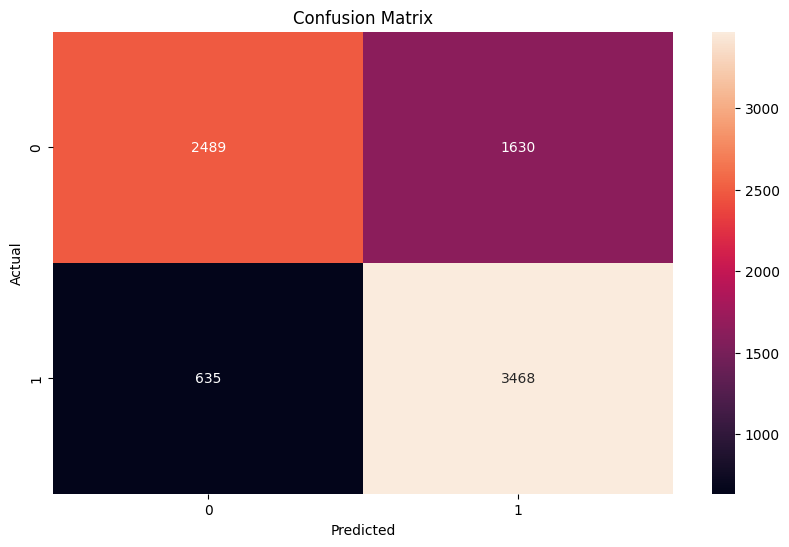

--------------------------------------------------------------------------------
Fitting model with poly kernal
training accuracy with hyperparams: 0.7579369906337429 

validation accuracy with hyperparams: 0.7374118219411335 



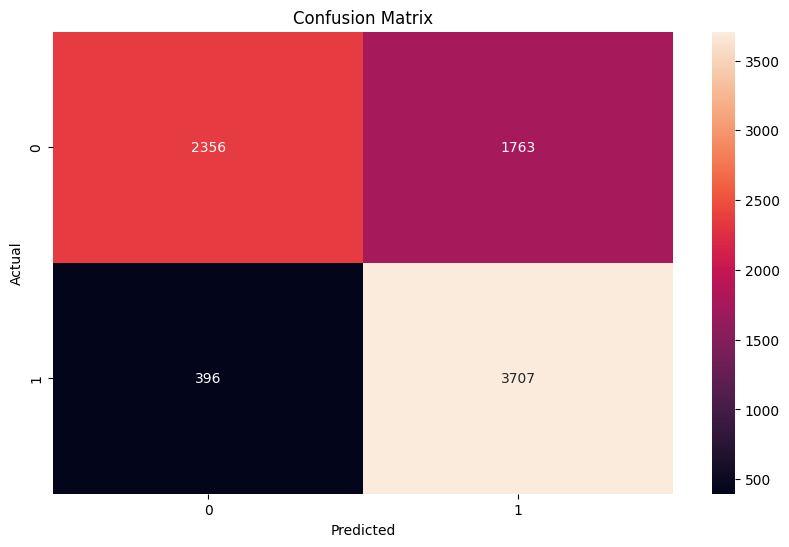

--------------------------------------------------------------------------------
Fitting model with sigmoid kernal
training accuracy with hyperparams: 0.6269715768560191 

validation accuracy with hyperparams: 0.630625152031136 



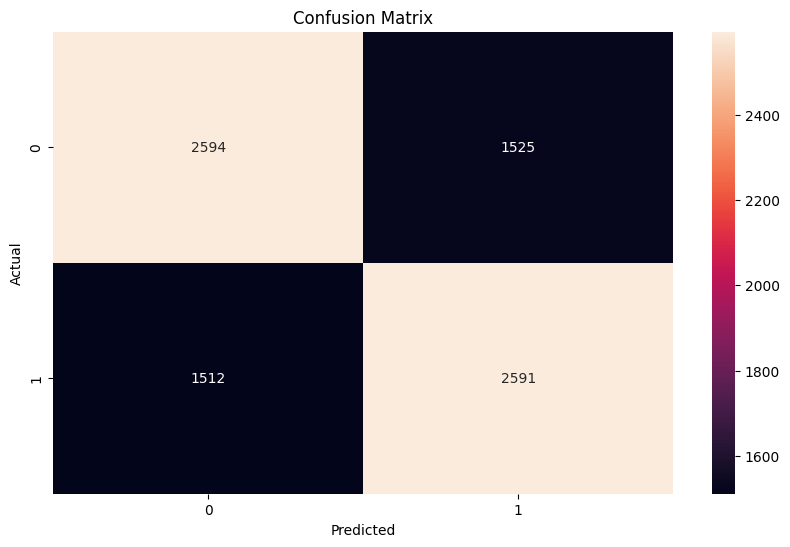

--------------------------------------------------------------------------------
Fitting model with rbf kernal
training accuracy with hyperparams: 0.786441227750071 

validation accuracy with hyperparams: 0.771588421308684 



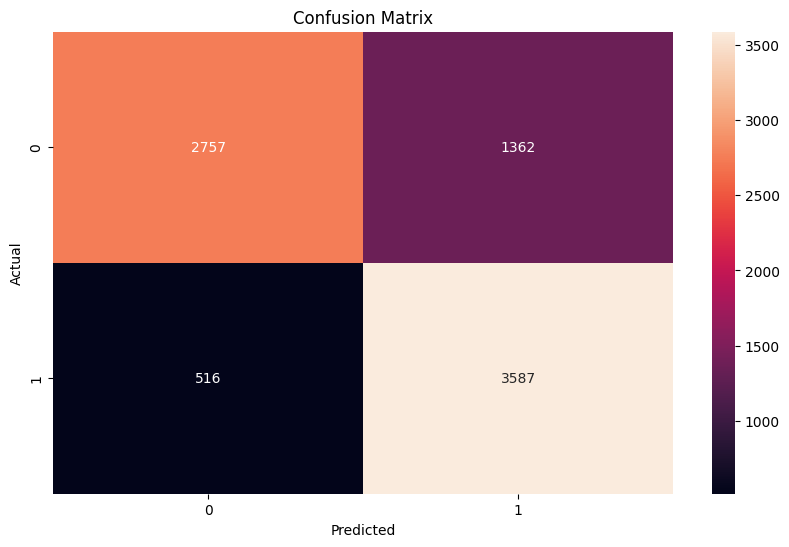

--------------------------------------------------------------------------------


In [ ]:
kernel_list=["linear","poly", "sigmoid","rbf"]
for i in kernel_list:
  try_kernels(i)

RANDOM FOREST CLASSIFIER:::

In [ ]:
def perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test,min_samples_leaf=1,max_leaf_nodes=None,n_estimators=100, max_depth=None,feature_analysis=False,cm=True):
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
    rf_clf.fit(X_train, y_train)

    # Evaluate the training and validation accuracy
    train_acc = rf_clf.score(X_train, y_train)
    val_acc = rf_clf.score(X_val, y_val)
    # test_acc = rf_clf.score(X_test, y_test)

    print(f'Training accuracy: {train_acc:.4f}')
    print(f'Validation accuracy: {val_acc:.4f}')
    # print(f'Testing accuracy: {test_acc:.4f}')

    # Analyze feature importance
    if feature_analysis:
        feature_importance = rf_clf.feature_importances_
        sorted_idx = feature_importance.argsort()[::-1]
        print("Feature Importance Ranking:")
        for idx in sorted_idx:
            print(f'Feature {idx+1}: {feature_importance[idx]:.4f}')


    # Generate confusion matrix
    if cm:
      y_pred = rf_clf.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix:")

      matplot.subplots(figsize=(10, 6))
      sns.heatmap(cm, annot = True, fmt = 'g')
      matplot.xlabel("Predicted")
      matplot.ylabel("Actual")
      matplot.title("Confusion Matrix")
      matplot.show()
    return train_acc, val_acc

Training accuracy: 0.9995
Validation accuracy: 0.7838
Confusion Matrix:


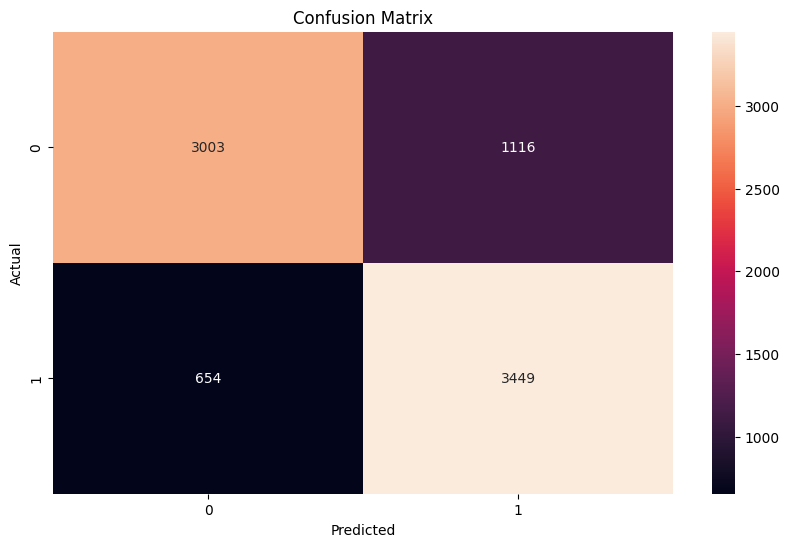

(0.9994728946194704, 0.7838462474151563)

In [ ]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

Training accuracy: 0.7700
Validation accuracy: 0.7595
Confusion Matrix:


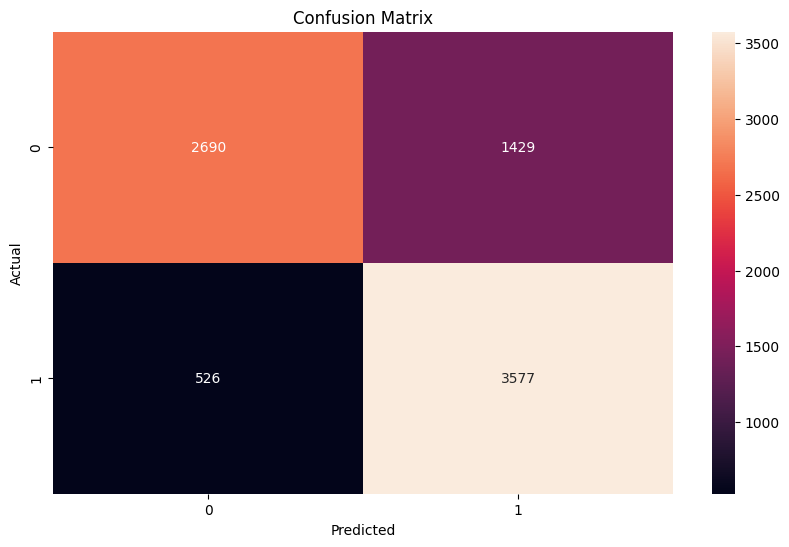

(0.7699793212504561, 0.7595183067753315)

In [ ]:
# Use Random Forest with different values of hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=500, max_depth=5)

Training accuracy: 0.8196
Validation accuracy: 0.7751
Feature Importance Ranking:
Feature 8: 0.2981
Feature 7: 0.1483
Feature 1: 0.1350
Feature 2: 0.0745
Feature 4: 0.0644
Feature 12: 0.0619
Feature 6: 0.0604
Feature 10: 0.0533
Feature 15: 0.0273
Feature 9: 0.0197
Feature 11: 0.0185
Feature 14: 0.0157
Feature 5: 0.0095
Feature 3: 0.0076
Feature 13: 0.0060
Confusion Matrix:


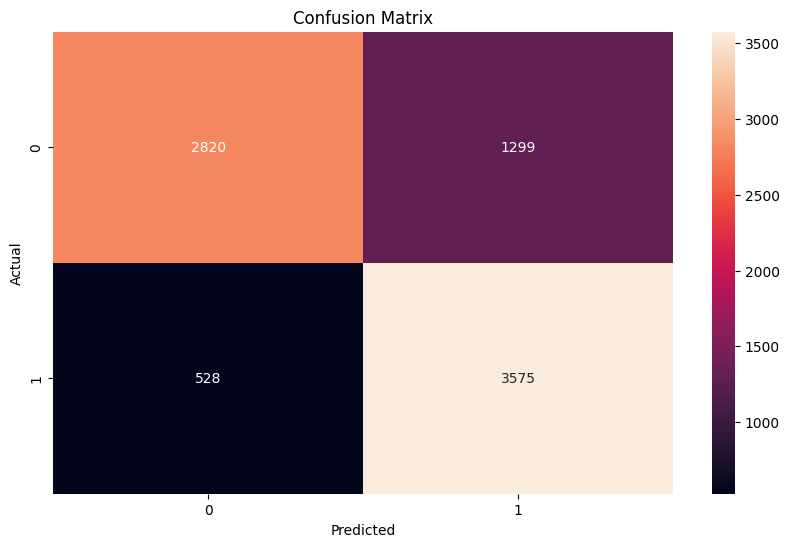

(0.8196488667234318, 0.7750881887848193)

In [ ]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=10,feature_analysis=True)

In [ ]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=50, max_depth=10,feature_analysis=False,max_leaf_nodes=50,min_samples_leaf=5,cm=False)

Training accuracy: 0.7840
Validation accuracy: 0.7706


(0.7839678871183554, 0.7705875197664518)

In [ ]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=10, max_depth=10,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=100,cm=False)

Training accuracy: 0.7560
Validation accuracy: 0.7509


(0.7559907553825569, 0.7508818878481937)

In [ ]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=100,feature_analysis=False,max_leaf_nodes=500,min_samples_leaf=5,cm=False)

Training accuracy: 0.8512
Validation accuracy: 0.7774


(0.8511940964197381, 0.7773993431456028)

In [ ]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=None,feature_analysis=False,max_leaf_nodes=None,min_samples_leaf=1,cm=False)

Training accuracy: 0.9995
Validation accuracy: 0.7852


(0.9994728946194704, 0.7851842841503467)

Final Model:::

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=100,min_samples_leaf=5,max_leaf_nodes=500)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=500, min_samples_leaf=5)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print("model accuracy:",metrics.accuracy_score(y_test, y_pred))
print("model recall:",metrics.recall_score(y_test, y_pred, zero_division=1))
print("model precision:",metrics.precision_score(y_test, y_pred, zero_division=1))
print("classification report:",metrics.classification_report(y_test, y_pred, zero_division=1))

model accuracy: 0.7813184140111895
model recall: 0.8515720204728248
model precision: 0.7461029254751228
classification report:               precision    recall  f1-score   support

           0       0.83      0.71      0.77      4119
           1       0.75      0.85      0.80      4103

    accuracy                           0.78      8222
   macro avg       0.79      0.78      0.78      8222
weighted avg       0.79      0.78      0.78      8222

